# Adaline - Adaptive Linear Neuron
---

The activation function is one of the most important things in machine learning.

What happens if the activation function is the identity function?
We create a new model, called the Adaline.
The Adaline, differently from the perceptron, can converge to a solution even if the data is not linearly separable.

The Adaline works by minimizing the mean squared errors of the predictions of a linear function.
This means that the learning procedure is based on the outcome of a linear function rather than on the outcome of a threshold function as in the perceptron.

Mathematically, the Adaline is described by:
- a linear function that aggregates the input signal
- a learning procedure to adjust connection weights

### Activation function

The activation function is the same of the perceptron, but without the sign.

$$h(x) = \sum_{i=0}^{N} w_i x_i$$

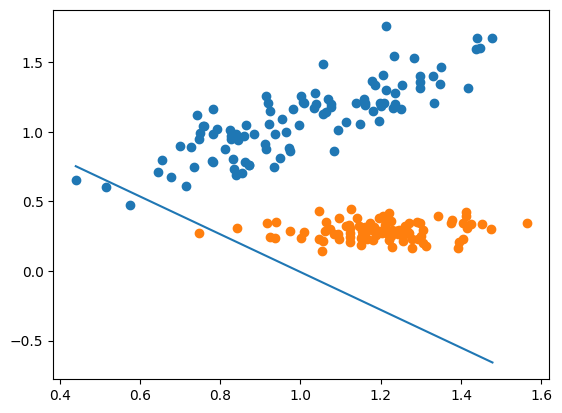

In [38]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

N = 100

# generating the points for the first class
X1_1 = 2 * np.random.normal(loc=0.5, scale=0.1, size=N)
X1_2 = 2 * np.random.normal(loc=0.6, scale=0.07, size=N)

# generating the points for the second class
X2_1 = X1_1 + np.random.normal(loc=0, scale=0.15, size=N) + 0.1
X2_2 = np.random.normal(loc=0.6, scale=0.07, size=N) - 0.3

# we need the coordinate X0 for the bias term
X0 = np.ones(N * 2)

X1 = np.concatenate((X1_1, X1_2))
X2 = np.concatenate((X2_1, X2_2))

# generating the labels 1, -1 to associate to the data
Y1 = np.ones(N)
Y2 = -np.ones(N)

X = np.stack((X0, X1, X2), axis=1)
Y = np.concatenate((Y1, Y2))

# generate w_0,....,w_n
W = np.random.uniform(low=-1, size=3)

plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)

plt.plot(
    [np.min(X1_1), np.max(X1_1)],
    [
        np.min(X1_1) * (-W[1] / W[2]) - (W[0] / W[2]),
        np.max(X1_2) * (-W[1] / W[2]) - (W[0] / W[2]),
    ],
)


### Sum of Squared Errors

The Sum of Squared Errors is a common loss function used in machine learning, particularly in the Adaline algorithm.


# of epochs =  1000
# of errors =  13.310660055677882


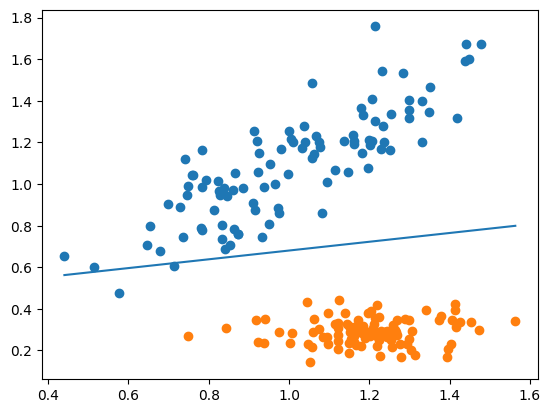

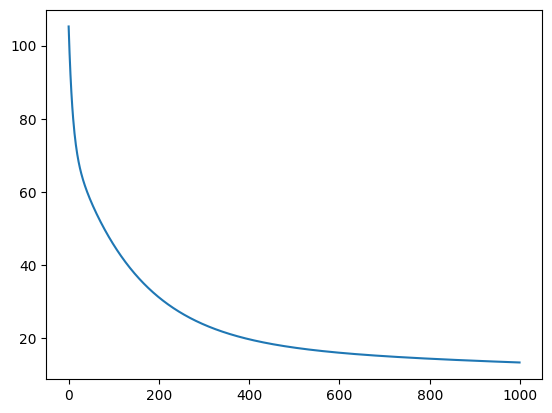

In [39]:
def error_sse(errors):
    return np.sum(np.square(errors)) / 2


eta = 0.01
epochs = 0
max_epochs = 1000
total_error = np.zeros(max_epochs)

while epochs < max_epochs:
    # compute the current ouput
    adaline_output = np.dot(X, W)
    # compute the error for each data point
    errors = Y - adaline_output
    # compute SSE error at this epoch
    total_error[epochs] = error_sse(errors)

    # check if a solution is found
    # if the output is negative and the label is negative the product is > 0
    # if the output is positive and the label is positive the product is > 0
    if all(adaline_output * Y > 0):
        break
    else:
        # update with W = W + delta_w
        # delta_w = eta * w/n * X^T * (Y - X^T W)
        delta_w = eta * 2 * np.dot(X.T, errors) / X.shape[0]
        W = W + delta_w

    epochs += 1

print("# of epochs = ", epochs)
print("# of errors = ", total_error[-1])
plt.scatter(X1_1, X2_1)  # plotting the first feature
plt.scatter(X1_2, X2_2)  # plotting the second feature
plt.plot(
    [np.min(X1), np.max(X1)],
    [
        np.min(X1) * (-W[1] / W[2]) - W[0] / W[2],
        np.max(X1) * (-W[1] / W[2]) - W[0] / W[2],
    ],
)
plt.figure()
plt.plot(range(max_epochs), total_error)